# Module

In [1]:
# required module
import numpy as np
from PIL import Image
from pylab import *

#torch
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms

In [55]:
#obtain the example training data

num=128*128
num_data=29-1

def callingFunc(i):
    x1 = Image.open(
        r'data/data2fIm/input2d'+str(i)+'.jpg').convert('L');
    y1 = np.asarray(x1.getdata(), dtype=np.float64).reshape((x1.size[1], x1.size[0]));
    target_x1 = Image.open(
        r'data/label2fIm/target2l'+str(i)+'.jpg').convert('L');
    target_y1 = np.asarray(target_x1.getdata(), dtype=np.float64).reshape(
        (target_x1.size[1], target_x1.size[0]));
    y_dat1 = np.asarray(y1, dtype=np.uint8);
    y_dat1_Im = transforms.ToTensor()(y_dat1).unsqueeze_(0);
    
    target_dat1_y = np.asarray(target_y1, dtype=np.uint8);
    target_dat1_y_Im = transforms.ToTensor()(target_dat1_y).unsqueeze_(0)   ;
    
    labels=torch.round(target_dat1_y_Im.view(-1, num)[0])
    
    return y_dat1, y_dat1_Im, target_dat1_y, target_dat1_y_Im, labels

#data
print(callingFunc(1)[1].shape)
print(callingFunc(1)[3].shape)

torch.Size([1, 1, 128, 128])
torch.Size([1, 1, 128, 128])


In [56]:
inputs = [callingFunc(i+1)[1] for i in range(num_data)]
labels = [callingFunc(i+1)[4] for i in range(num_data)]

## Visualization of data

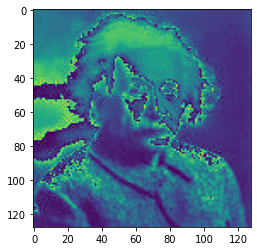

In [51]:
plt.imshow(callingFunc(1)[0])

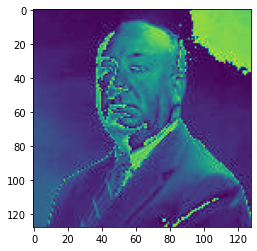

In [52]:
plt.imshow(callingFunc(2)[0])

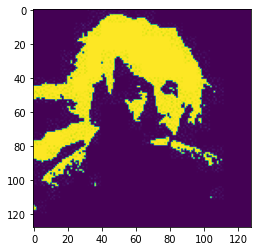

In [53]:
plt.imshow(callingFunc(1)[2])

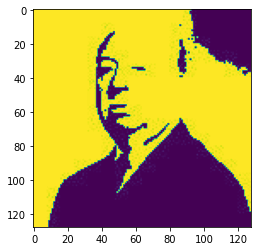

In [54]:
plt.imshow(callingFunc(2)[2])

# Model

In [110]:
#modeling with 16384 x 20 x 20 x 16384



class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # input is last input 6, and output is 16, just 16, and kernel size is 5
        self.fc1 = nn.Linear(num, 100)
        #input of 16*5*5, output is 120 just randomw
        self.fc2 = nn.Linear(100, 100)
        #input of last number 120, and 84 randome
        self.fc3 = nn.Linear(100, num)
        #output is 62*29*29  corrspond all the data.
        self.softmax =nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, num)            # -> n, 16384
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 120
        x = self.softmax(self.fc3(x))    # -> n, 52142
    
        return x
    
net = Net()

In [116]:
#devices, model, criterion, optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net()
model = Net().to(device)
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=100)

# Training

In [117]:
print('Traning Start')
for epoch in range(1000):  # loop over the dataset multiple times
    
    for ix in range(num_data):
        running_loss = 0.0

        # get the inputs; data is a list of [inputs, labels]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs[ix])[0]

        loss = criterion(outputs,labels[ix])
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print(epoch,"iteration L= ",running_loss);

print('Finished Training')

Traning Start
0 iteration L=  0.6925941109657288
1 iteration L=  0.6904124021530151
2 iteration L=  0.6883746385574341
3 iteration L=  0.6864703297615051
4 iteration L=  0.6846899390220642
5 iteration L=  0.6830242872238159
6 iteration L=  0.6814655065536499
7 iteration L=  0.6800056099891663
8 iteration L=  0.6786375641822815
9 iteration L=  0.6773550510406494
10 iteration L=  0.6761517524719238
11 iteration L=  0.675022304058075
12 iteration L=  0.6739615201950073
13 iteration L=  0.6729644536972046
14 iteration L=  0.6720268726348877
15 iteration L=  0.6711447238922119
16 iteration L=  0.6703140735626221
17 iteration L=  0.6695317029953003
18 iteration L=  0.6687942147254944
19 iteration L=  0.668098509311676
20 iteration L=  0.6674420237541199
21 iteration L=  0.6668221354484558
22 iteration L=  0.6662364602088928
23 iteration L=  0.6656827926635742
24 iteration L=  0.6651592254638672
25 iteration L=  0.664663553237915
26 iteration L=  0.6641944050788879
27 iteration L=  0.66374981

225 iteration L=  0.6543460488319397
226 iteration L=  0.6543458104133606
227 iteration L=  0.6543456315994263
228 iteration L=  0.6543453931808472
229 iteration L=  0.6543451547622681
230 iteration L=  0.6543449759483337
231 iteration L=  0.6543447971343994
232 iteration L=  0.6543446183204651
233 iteration L=  0.6543444395065308
234 iteration L=  0.6543443202972412
235 iteration L=  0.6543441414833069
236 iteration L=  0.6543439626693726
237 iteration L=  0.654343843460083
238 iteration L=  0.6543436646461487
239 iteration L=  0.6543435454368591
240 iteration L=  0.6543433666229248
241 iteration L=  0.6543432474136353
242 iteration L=  0.6543431282043457
243 iteration L=  0.6543430089950562
244 iteration L=  0.6543428897857666
245 iteration L=  0.654342770576477
246 iteration L=  0.6543426513671875
247 iteration L=  0.654342532157898
248 iteration L=  0.6543424129486084
249 iteration L=  0.6543422937393188
250 iteration L=  0.6543422341346741
251 iteration L=  0.6543421745300293
252 

KeyboardInterrupt: 

In [118]:
outputs = net(inputs[0])[0]
train_acc = torch.sum(torch.round(torch.flatten(outputs)) == labels[0])/(num)
print("Training Accuracy =",np.round(np.array(train_acc),2))

Training Accuracy = 0.62


## Training Result

torch.Size([1, 1, 128, 128])


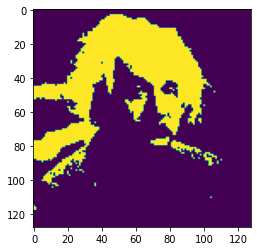

In [119]:
#labeling data
target1=labels[0].reshape([1,1,128,128])
print(target1.shape)
plt.imshow(target1[0][0].detach().cpu().numpy())

torch.Size([1, 1, 128, 128])


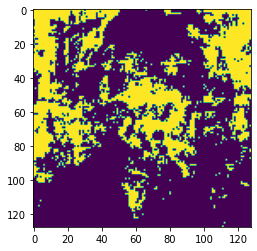

In [120]:
# trained data
outputs = net(inputs[0])
output1=torch.round(outputs.reshape([1,1,128,128]))
print(output1.shape)
plt.imshow(output1[0][0].detach().cpu().numpy())

# Validating Model

torch.Size([1, 1, 128, 128])


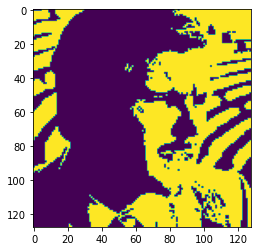

In [121]:
#labeling data
target1=callingFunc(29)[4].reshape([1,1,128,128])
print(target1.shape)
plt.imshow(target1[0][0].detach().cpu().numpy())

torch.Size([1, 1, 128, 128])


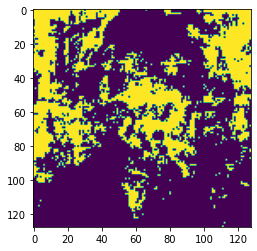

In [122]:
# trained data
outputs = net(callingFunc(29)[1])
output1=torch.round(outputs.reshape([1,1,128,128]))
print(output1.shape)
plt.imshow(output1[0][0].detach().cpu().numpy())

In [80]:
train_acc = torch.sum(torch.round(torch.flatten(outputs)) == callingFunc(29)[4][0])/(num)
print("Training Accuracy =",np.round(np.array(train_acc),2))

Training Accuracy = 0.64


## Visualization